# Linear Regression
Linear Regression is supervised machine learning algorithm which is used to determine a line of best fit in the given data. It makes use of a cost function, which we minimize using optimization algorithms like gradient descent to get the minimum value of cost function and the corresponding value of $\theta$ , which is used to make a linear model for our dataset.  <br><br>
$ h(\theta_0,\theta_1) = \theta_0 + \theta_1 X $ <br><br>
$ J(\theta_0 , \theta_1) = \frac{1}{2m} \sum_{i=1}^m ( h(\theta_0,\theta_1) - Y ) $ <br><br>

### Gradient Descent
Used for optimization of loss function. The algorithm gor gradient descent is as follows : <br><br>
repeat until convergence {<br><br>
    $\,\,\,\, \theta_j := \theta_j - \alpha \frac{\partial J(\theta_0,\theta_1)}{\partial \theta_j} $<br>
    $\,\,\,\,$// simulateous updates of all the $\theta$ values <br><br>
}<br>


In [28]:
# import the numpy library which is a fundamental package for scientific computing with Python
from numpy import *
import matplotlib.pyplot as plt

### SSE (Sum of Squares Error)
The equation for the calculation of this error is given by : <br><br>
$ \sum_{i=1}^n (x - x_{mean})^2 $<br><br>
The error in linear regression is defined as : <br><br>
$ Error_{(m,b)} = \frac{1}{N} \sum_{i=1}^N (y_i - (mx_i + b))^2 $<br><br>

#### Explanation : 
We have an initial y value in our dataset ($y_i$), from which we subtract the y value obtained by calculating mx + b .
We are calculating the distance between the y in our dataset and the corresponding y on our line, and then squaring it. We square it for two reasons : firstly we do not want any neagtive values beacuse we need to sum all the distances together and secondly we dont actually care about the value itself, we are more concerned with the magnitude. <br>

So, we are calculating the SSE and work on minimizing this error.

In [10]:
# this function is used to calculate the sum of squares error (SSE)
def compute_error_for_given_points(b,m,points):
    totalError = 0
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        totalError += (y - (m*x + b)) **2
    return totalError / float(len(points))

### Gradient Descent Calculations
The following derivatives are calculated for gradient descent : <br><br>
$ \frac{\partial}{\partial m} = \frac{2}{N} \sum_{i=1}^N -x_i(y_i - (mx_i + b)) $<br><br>
$ \frac{\partial}{\partial b} = \frac{2}{N} \sum_{i=1}^N -(y_i - (mx_i + b)) $<br><br>

In [16]:
# this is the function where we implement the gradient descent
def step_gradient(b,m,points,learning_rate):
    # gradinet descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y - ((m*x) + b))
        m_gradient += -(2/N) * (y - ((m*x) + b)) * x
    new_b = b - (learning_rate * b_gradient)
    new_m = m - (learning_rate * m_gradient)
    return [new_b,new_m]

In [17]:
# this function is used to call the gradinet descent function multiple times (num_iterations)
def gradient_descent_runner(points,initial_b,initial_m,learning_rate,num_iterations):
    b=initial_b
    m=initial_m
    for i in range(num_iterations):
        b,m = step_gradient(b,m,array(points),learning_rate)
    return [b,m]

### Matplotlib
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.<br>
Here we use matplotlib to plot the data points along with the regression line.  <br>

In [32]:
def plot__simple_graph(data,b,m):
    plt.figure(figsize=(10,5))
    plt.title('Marks vs Study Hours')
    plt.scatter(x=data[:,0],y=data[:,1])
    plt.plot(data[:,0], m*data[:,0] + b,color='red',label='Our Fitting Line')
    plt.xlabel('Study Hours')
    plt.ylabel('Marks')
    plt.show()

Starting values : 
m =  0  , b =  0  , error =  5565.107834483211


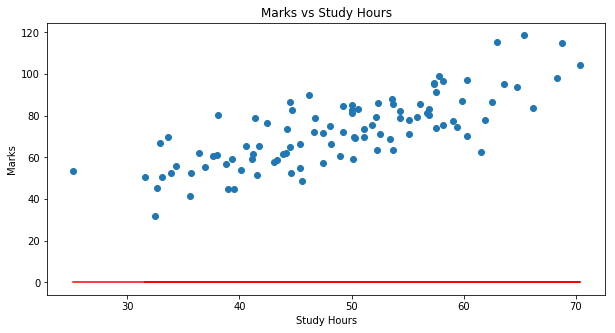

Final values : 
m =  1.4777440851894448  , b =  0.08893651993741344  , error =  112.61481011613473


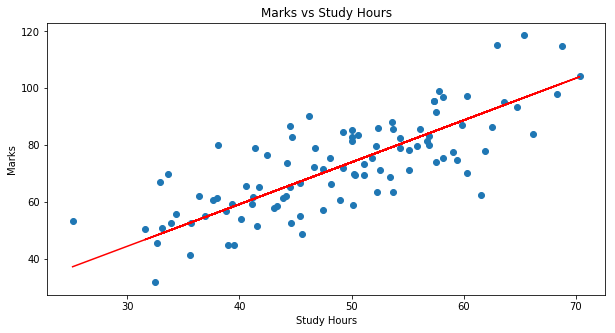

In [38]:
# main function where we load the data, initialize the variables with initial values and call the gradient descent runner
def run():
    points = genfromtxt('data.csv',delimiter = ',')
    #hyperparameters (alpha) -> should neither be too low nor too high
    learning_rate = 0.0001
    # y= mx + b
    initial_b = 0
    initial_m = 0
    num_iterations = 1000
    
    print('Starting values : ')
    print('m = ',initial_m,' , b = ',initial_b,' , error = ',compute_error_for_given_points(initial_b,initial_m,points))
    plot__simple_graph(points,initial_b,initial_m)
    [b, m] = gradient_descent_runner(points,initial_b,initial_m,learning_rate,num_iterations)
    print('Final values : ')
    print('m = ',m,' , b = ',b,' , error = ',compute_error_for_given_points(b,m,points))
    plot__simple_graph(points,b,m)
    

run()